In [55]:
import pandas as pd
import numpy as np
import anthony_wranglev2

In [56]:
# read in the credit history data
cred_df = anthony_wranglev2.get_reports_data('credit_record.csv')

In [57]:
# lets see the percentage of the users that defaulted
cred_df.defaulted.value_counts()/len(cred_df)

0    0.997018
1    0.002982
Name: defaulted, dtype: float64

In [58]:
# read in the application data
app_df = anthony_wranglev2.get_application_data('application_record.csv')

In [59]:
app_df.head()

,id,code_gender,flag_own_car,flag_own_realty,cnt_children,amt_income_total,name_income_type,name_education_type,name_family_status,name_housing_type,days_birth,days_employed,flag_mobil,flag_work_phone,flag_phone,flag_email,occupation_type,cnt_fam_members,employed_years,age
0,5008804,M,1,1,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,12005,4542,1,1,0,0,Other,2.0,12.0,32.0
1,5008805,M,1,1,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,12005,4542,1,1,0,0,Other,2.0,12.0,32.0
2,5008806,M,1,1,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,21474,1134,1,0,0,0,Security staff,2.0,3.0,58.0
3,5008808,F,0,1,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,19110,3051,1,0,1,1,Sales staff,1.0,8.0,52.0
4,5008809,F,0,1,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,19110,3051,1,0,1,1,Sales staff,1.0,8.0,52.0


In [60]:
cred_df

,id,0-29,30-59,60-89,90-119,120-149,paid_off,no_debt,months_exist,month_01,...,first_half_score,difference_score,odds_evens_score,beggining_score,middle_score,ending_score,spread_score,alpha_omgea_score,beggining_ending_score,defaulted
0,5001712,3.0,0.0,0.0,0.0,0.0,3.0,0.0,19,2,...,6,-3,6,4,3,2,6,3,8,0
1,5001713,0.0,0.0,0.0,0.0,0.0,0.0,6.0,22,0,...,0,0,0,0,0,0,0,0,0,0
2,5001714,0.0,0.0,0.0,0.0,0.0,0.0,6.0,15,0,...,0,0,0,0,0,0,0,0,0,0
3,5001715,0.0,0.0,0.0,0.0,0.0,0.0,6.0,60,0,...,0,0,0,0,0,0,0,0,0,0
4,5001717,6.0,0.0,0.0,0.0,0.0,0.0,0.0,22,2,...,6,0,8,4,4,4,8,4,8,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32187,5150481,0.0,0.0,0.0,0.0,0.0,0.0,6.0,43,0,...,0,0,0,0,0,0,0,0,0,0
32188,5150482,6.0,0.0,0.0,0.0,0.0,0.0,0.0,18,2,...,6,0,8,4,4,4,8,4,8,0
32189,5150483,0.0,0.0,0.0,0.0,0.0,0.0,6.0,18,0,...,0,0,0,0,0,0,0,0,0,0
32190,5150484,6.0,0.0,0.0,0.0,0.0,0.0,0.0,13,2,...,6,0,8,4,4,4,8,4,8,0


In [61]:
from imblearn.over_sampling import SMOTE, RandomOverSampler

In [62]:
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import RandomOverSampler 
X, y = make_classification(n_classes=2, class_sep=2,
weights=[0.1, 0.9], n_informative=3, n_redundant=1, flip_y=0,
n_features=20, n_clusters_per_class=1, n_samples=1000, random_state=10)
print('Original dataset shape %s' % Counter(y))

# ros = RandomOverSampler(random_state=42)
# X_res, y_res = ros.fit_resample(X, y)
# print('Resampled dataset shape %s' % Counter(y_res))


Original dataset shape Counter({1: 900, 0: 100})


In [63]:
len(y)

1000

In [64]:
X = cred_df.drop(columns = 'defaulted')

In [65]:
y = cred_df['defaulted']

In [66]:
ros = RandomOverSampler(random_state=42)
X_res, y_res = ros.fit_resample(X, y)
print('Resampled dataset shape %s' % Counter(y_res))


Resampled dataset shape Counter({0: 32096, 1: 32096})


In [67]:
def under_sample(X_var, y_var, method):
    '''This function takes X_variables, y_variables, and a method to under sample. It them does the necessary imports
    and uses the default sampling technique(auto) and returns undersampled version of X_var and y_var'''
    
    from imblearn.under_sampling import method
    obj = method(random_state = 123)
    X_res, y_res = obj.fit_resample(X_var, y_var)
    return X_res, y_res

In [68]:
def over_sample(X_var, y_var, method):
    '''This function takes X_variables, y_variables, and a method to over sample. It them does the necessary imports
    and uses the default sampling technique(auto) and returns oversampled version of X_var and y_var'''
    
    from imblearn.over_sampling import method
    obj = method(random_state = 123)
    X_res, y_res = obj.fit_resample(X_var, y_var)
    return X_res, y_res

In [69]:
import seaborn as sns
import matplotlib.pyplot as plt

In [70]:
# merge the app_df and expanded cred_df together on id to get the final df
final_df = app_df.merge(cred_df, on='id', how='inner')
final_df

,id,code_gender,flag_own_car,flag_own_realty,cnt_children,amt_income_total,name_income_type,name_education_type,name_family_status,name_housing_type,...,first_half_score,difference_score,odds_evens_score,beggining_score,middle_score,ending_score,spread_score,alpha_omgea_score,beggining_ending_score,defaulted
0,5008804,M,1,1,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,3,0,4,2,2,2,4,2,4,0
1,5008805,M,1,1,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,3,0,4,2,2,2,4,2,4,0
2,5008806,M,1,1,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,...,4,-1,7,2,4,1,4,3,4,0
3,5008810,F,0,1,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,...,3,0,4,2,2,2,4,2,4,0
4,5008811,F,0,1,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,...,3,0,4,2,2,2,4,2,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24487,5149729,M,1,1,0,90000.0,Working,Secondary / secondary special,Married,House / apartment,...,6,-2,8,4,4,2,6,4,8,0
24488,5149775,F,1,1,0,130500.0,Working,Secondary / secondary special,Married,House / apartment,...,3,0,4,2,2,2,4,2,4,0
24489,5149834,F,0,1,0,157500.0,Commercial associate,Higher education,Married,House / apartment,...,9,0,12,6,6,6,12,6,12,1
24490,5149838,F,0,1,0,157500.0,Pensioner,Higher education,Married,House / apartment,...,9,0,12,6,6,6,12,6,12,1


In [71]:
# splitting into train validate and test for exploration
train, validate, test = anthony_wranglev2.wrangle_credit()


In [72]:
train.head()

,id,code_gender,flag_own_car,flag_own_realty,cnt_children,amt_income_total,name_income_type,name_education_type,name_family_status,name_housing_type,...,first_half_score,difference_score,odds_evens_score,beggining_score,middle_score,ending_score,spread_score,alpha_omgea_score,beggining_ending_score,defaulted
22151,5142128,F,0,0,0,283500.0,Commercial associate,Secondary / secondary special,Married,Municipal apartment,...,0,0,0,0,0,0,0,0,0,0
21572,5136981,F,0,0,0,306000.0,State servant,Higher education,Married,House / apartment,...,7,-2,9,4,6,2,9,3,8,0
8328,5052719,F,0,0,0,126000.0,Pensioner,Secondary / secondary special,Married,House / apartment,...,3,0,4,2,2,2,4,2,4,0
19787,5117901,F,0,0,0,76500.0,Pensioner,Secondary / secondary special,Widow,House / apartment,...,3,0,4,2,2,2,4,2,4,0
12424,5069147,M,0,1,0,216000.0,Commercial associate,Higher education,Married,House / apartment,...,2,-1,3,2,0,1,0,3,4,0


In [73]:
train.columns

Index(['id', 'code_gender', 'flag_own_car', 'flag_own_realty', 'cnt_children',
       'amt_income_total', 'name_income_type', 'name_education_type',
       'name_family_status', 'name_housing_type', 'days_birth',
       'days_employed', 'flag_mobil', 'flag_work_phone', 'flag_phone',
       'flag_email', 'occupation_type', 'cnt_fam_members', 'employed_years',
       'age', 'name_income_type_commercial_associate',
       'name_income_type_pensioner', 'name_income_type_state_servant',
       'name_income_type_student', 'name_income_type_working',
       'name_education_type_academic_degree',
       'name_education_type_higher_education',
       'name_education_type_incomplete_higher',
       'name_education_type_lower_secondary',
       'name_education_type_secondary_/_secondary_special',
       'name_housing_type_co-op_apartment',
       'name_housing_type_house_/_apartment',
       'name_housing_type_municipal_apartment',
       'name_housing_type_office_apartment',
       'name_housing

<AxesSubplot:xlabel='defaulted', ylabel='beggining_ending_score'>

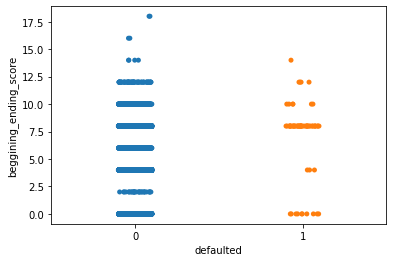

In [74]:
# lets do a stripplot of the begining_ending score
sns.stripplot(train.defaulted, train.beggining_ending_score)

<AxesSubplot:xlabel='defaulted', ylabel='beggining_ending_score'>

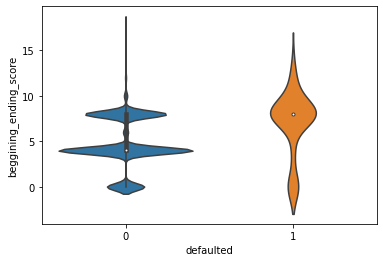

In [75]:
# lets get a violin plot of those defaulted and not against beginning and ending score
sns.violinplot(train.defaulted, train.beggining_ending_score)

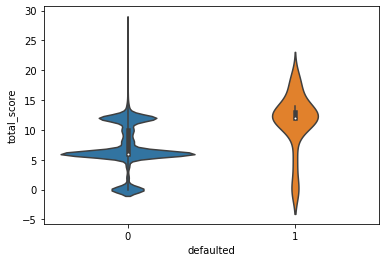

In [76]:
# lets do a stripplot of the begining_ending score
sns.violinplot(train.defaulted, train.total_score)
plt.show()

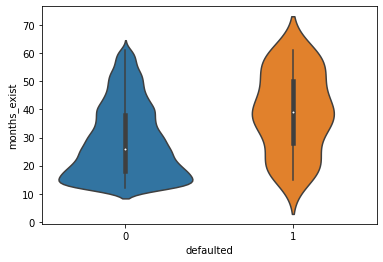

In [77]:
# lets check the distribution of the credit length between clients who default and those who dont
sns.violinplot(train.defaulted, train.months_exist)
plt.show()

<AxesSubplot:>

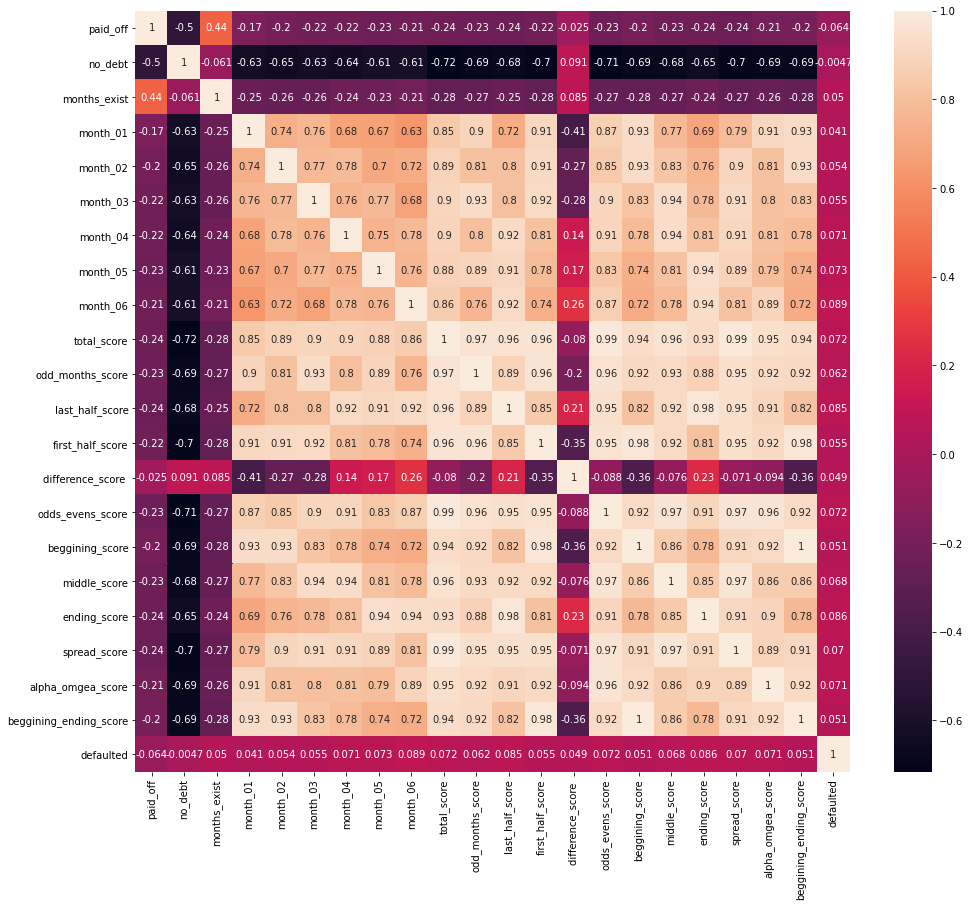

In [78]:

# lets plot a heat map of the correlation between the features we created and our target var
plt.figure(figsize = (16,14))
sns.heatmap(train.iloc[:,60:].corr(), annot = True)


- Nothing jumps out after looking at the heat map of the correlation between the features we created and our target var

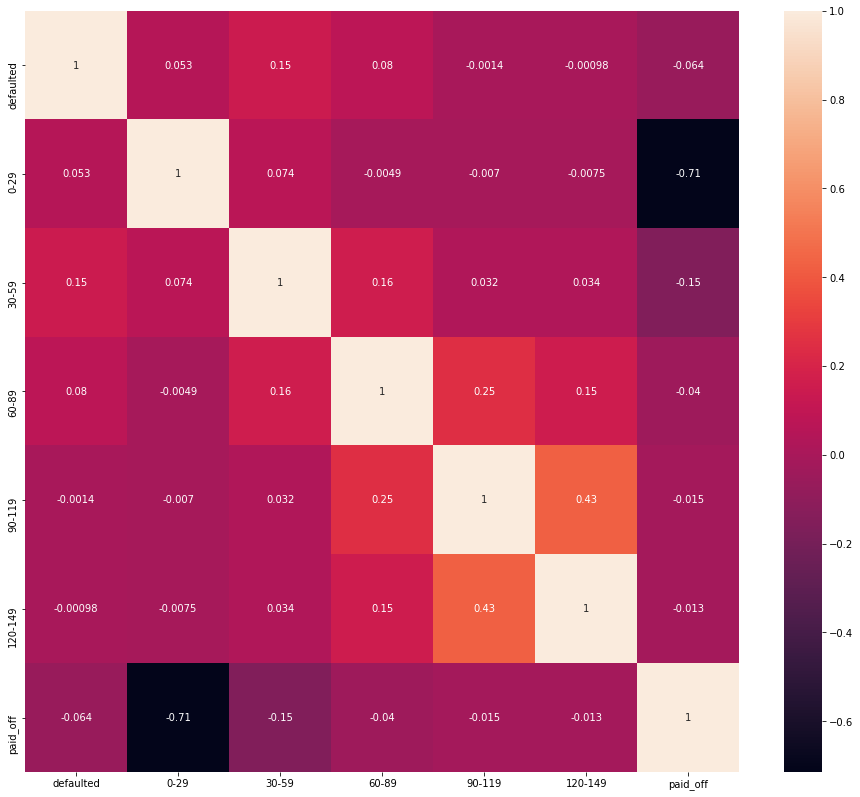

In [80]:
# lets plot a heat map of the correlation between the features we created and our target var
plt.figure(figsize = (16,14))
sns.heatmap(train.iloc[:, np.r_[81, 55:61]].corr(), annot = True)
plt.show()